In [1]:
import openpyxl
import numpy as np
from sklearn import preprocessing


class Datos:
    def __init__(self, name, rows):
        ## Abrir Excel con Datos
        file_train = name
        wb = openpyxl.load_workbook(file_train)
        sheet = wb.get_sheet_by_name('Sheet1')
        sheet = wb.active
        self.rows = rows

        # Forma matriz para contener datos
        columns = 20 
        self.cols_init = columns
        self.data_matrix = np.zeros(shape=(self.rows, columns))
        self.cols = columns
        self.target = np.zeros(shape=(self.rows, 1))
        
        # Columnas con datos no numericos, se deben pasar a labels numericos usando un LabelEncoder
        non_numerical_columns = [1, 4, 5, 8, 18, 19]  ##
        non_numerical_info = []
        clases = []
        clases_num_encode = []
        self.features_names = []
        empty_cell = sheet.cell(row=85, column=8).value  ## Ejemplo de celda vacia

        for i in range(columns):
            j = 0
            column_i = []

            flag_non_numeric = False
            flag_append = True

            # Verificar si la columna es de datos no numericos
            if i in non_numerical_columns:
                flag_non_numeric = True

            for cellObj in sheet.columns[i]:
                if j > 0:
                    if (cellObj.value == empty_cell) and (not flag_non_numeric):
                    #if (cellObj.value == empty_cell):
                        #flag_append = False
                        column_i.append(0)
                    else:
                        column_i.append(cellObj.value)

                else:
                    name = cellObj.value
                    if i>0:
                        if i != self.cols -1:
                            self.features_names.append(name)
                            print "Aadiendo: " + name


                j += 1


            if flag_non_numeric:
                le = preprocessing.LabelEncoder()
                le.fit(column_i)
                clases.append(list(le.classes_))

                n_clases = len(le.classes_)
                ordered_clases = np.linspace(0, n_clases - 1, n_clases)
                inverse_ordered = le.inverse_transform(list(ordered_clases.astype(int)))
                print ordered_clases
                print "Labels: ", str(inverse_ordered)

                non_numerical_info.append(sheet.cell(row=1, column=i+1).value)

                #enc = preprocessing.OneHotEncoder()
                #enc.fit(le.transform(column_i))
                #print enc.transform(le.transform(column_i)).toarray()

                # Encode de datos
                column_i = le.transform(column_i)

                # Encode de datos con OneHot Encode
                #column_i = enc.transform(le.transform(column_i)).toarray()

            if flag_append and i < self.cols - 1:
                self.data_matrix[:,i] = column_i
            else:
                print name + " no added"
                
            if i == self.cols - 1:
                self.target = column_i
             
        """
        self.target = np.zeros(shape=(rows, 1))
        j = 0
        for cellObj in sheet.columns[columns - 1]:
            if j>0:
                dato = cellObj.value 
                if dato == "PAGA":
                    self.target[i] = 1
                elif dato == "NO PAGA":
                    self.target[i] = 0
                else:
                    print "WTF"
            j += 1
         """
    def feat_names(self):
        return self.features_names
    
    def get_target(self):
        return self.target
    
    def get_matrix(self):
        return self.data_matrix
    
    def add_sum(self):
        self.cols += 1
        self.new_data_matrix = np.zeros(shape=(self.rows, self.cols))
        self.new_data_matrix[:,0:self.cols - 1] = self.data_matrix 
        
        for j in range(len(self.data_matrix[:,0])):
            a = self.data_matrix[j,9] + self.data_matrix[j,10] 
            b = self.data_matrix[j,11] + self.data_matrix[j,12]
            self.new_data_matrix[j, - 1] = (a + b)/4
        
        self.data_matrix = self.new_data_matrix
        self.features_names.append("Suma Creditos")
        
    def add_cuota_promedio(self):
        self.cols += 1
        self.new_data_matrix = np.zeros(shape=(self.rows, self.cols))
        self.new_data_matrix[:,0:self.cols - 1] = self.data_matrix 
        
        for j in range(len(self.data_matrix[:,0])):
            a = self.data_matrix[j,13]  
            b = self.data_matrix[j,17] 
            self.new_data_matrix[j, - 1] = a / b
        
        self.data_matrix = self.new_data_matrix
        self.features_names.append("Cuota Promedio")
        
                
train_datos = Datos('CREDITRISK_RAW.xlsx', 2294)
data_matrix = train_datos.get_matrix()
  

Aadiendo: GENERO
[ 0.  1.  2.]
Labels:  [None u'F       ' u'M       ']
Aadiendo: RENTA
Aadiendo: EDAD
Aadiendo: NIV_EDUC
[ 0.  1.  2.  3.  4.  5.  6.]
Labels:  [None u'        ' u'BAS     ' u'EUN     ' u'MED     ' u'TEC     '
 u'UNV     ']
Aadiendo: E_CIVIL
[ 0.  1.  2.  3.  4.]
Labels:  [None u'CAS     ' u'SEP     ' u'SOL     ' u'VIU     ']
Aadiendo: COD_OFI
Aadiendo: COD_COM
Aadiendo: CIUDAD
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.]
Labels:  [None u'                ' u'ANCUD           ' u'ANGOL           '
 u'ANTOFAGASTA     ' u'ARICA           ' u'AYSEN           '
 u'CALAMA          ' u'CALBUCO         ' u'CALDERA         '
 u'C

In [2]:
# Eliminar NaN values
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(data_matrix)

data_matrix = imp.transform(data_matrix)

In [3]:
## Calculo de caracteristicas

start_money_values = 9
finish_money_values = 12

"""
for i in range(12-9):
    for j in range(len(data_matrix[:,0])):
        sueldo = data_matrix[j,2]
        data_matrix[:,9+i] = data_matrix[:,9+i]/sueldo 
"""

train_datos.add_sum()
train_datos.add_cuota_promedio()
data_matrix = train_datos.get_matrix()



imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(data_matrix)

data_matrix = imp.transform(data_matrix)


C:\Users\Nico\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Feature ranking:
1. EDAD: 0.178466132317
2. GENERO: 0.125074452147
3. NIV_EDUC: 0.102087709181
4. COD_COM: 0.0967135620272
5. COD_OFI: 0.0799133163467
6. Número de meses inactivo: 0.0632803651284
7. RENTA: 0.0467967990324
8. CIUDAD: 0.044720424826
9. Crédito_4: 0.0442564970238
10. E_CIVIL: 0.0356317995128
11. Monto solicitado: 0.0335228950869
12. numero de cuotas: 0.0329807983071
13. Crédito_2: 0.0317540347136
14. Cuota Promedio: 0.0309335144113
15. Monto Deuda Promedio: 0.0254044830724
16. Días de Mora: 0.0111018439538
17. Crédito_1: 0.0095486930969
18. Aval: 0.0060199810909
19. Crédito_3: 0.00179269872429
20. Suma Creditos: 0.0


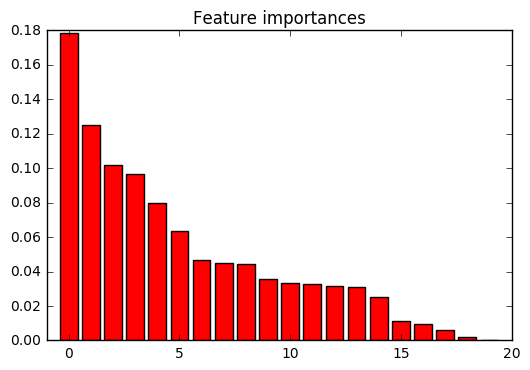

In [4]:
## Random Forest

%matplotlib inline
import matplotlib.pylab as plt

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

N_features = (len(data_matrix[0,:]) - 1) # Se resta ID y Label, PAGA o NO PAGA
X = data_matrix[:,1:N_features]
Y = train_datos.get_target()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state = True)


clf = RandomForestClassifier(n_estimators=650, max_depth=None, bootstrap = True, n_jobs = -1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict_proba(X_test)


importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
features_names = train_datos.feat_names()


for f in range(X.shape[1]):
    
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print str(f+1)+". "+ features_names[indices[f]] + ": "+str(importances[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", align="center")
#plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()


In [5]:
from time import time
from sklearn import metrics
t0 = time()
pred = clf.predict(X_test)
test_time = time() - t0
print("test time:  %0.3fs" % test_time)

score = metrics.accuracy_score(Y_test, pred)
print score

test time:  0.854s
0.934612031386


In [6]:
#Graficos en base a las caracteristicas más importantes según Random Forest

class Histogram:
    
    def __init__(self, data_matrix, target_matrix, feature_index, name):
        self.name = name
        self.index = feature_index
        rows = len(target_matrix)
        self.data = np.zeros(shape=(rows, 2))
        
        _columns = len(data_matrix[0,:])
        self.data[:,0] = data_matrix[:, self.index]
        #self.data[:,1] = data_matrix[:, _columns - 1]
        self.data[:,1] = target_matrix
        
        _N_datos = len(self.data[:,0])
        self.convert_data = np.zeros( shape = (_N_datos, 2))
    
        _Paga = 1;
        _NoPaga = 0;

        self.paga_hist = []
        self.no_paga_hist = []

        for i in range(_N_datos):
            if self.data[i,1] == _Paga:
                self.paga_hist.append( self.data[i,0])
            else:
                self.no_paga_hist.append( self.data[i,0])
                
        self.discrete = False


    def set_bins(self, init_range, final_range, nbins):
        self.bins = plt.linspace(init_range, final_range, nbins)
        self.nbins = nbins
        self.xlims = [init_range-0.5, final_range+0.5]
        print self.bins
        
    def is_discrete(self, discrete):
        init_range = 0
        final_range = discrete+0.5 
        nbins = discrete + 1
        self.bins = plt.linspace(init_range, final_range, nbins)
        self.nbins = discrete
        self.bar_l = plt.linspace(0,discrete-1, discrete)
        self.xlims = [-0.5, discrete+0.5]
        self.discrete = True

    def set_xlim(self, array):
        self.xlims = array
    
    def hist(self):
        _paid = self.paga_hist
        _no_paid = self.no_paga_hist
            
        x = [_paid, _no_paid]
        self.histo = plt.hist(x, self.bins)
        plt.clf()

        _to_bar_1 = self.histo[0][0]
        _to_bar_2 = self.histo[0][1]

        # Create the general blog and the "subplots" i.e. the bars
        f, ax1 = plt.subplots(1, figsize=(10,5))

        # Set the bar width
        bar_width = 0.75
        bar_width = (self.bins[self.nbins-1] - self.bins[0])/(self.nbins)

        # positions of the left bar-boundaries
        #bar_l = [(i+1)*2.5 for i in range(len(_to_bar_1))] #+ self.bins[0]
        bar_l = [self.bins[0] + (i+1)*(self.bins[self.nbins-1] - self.bins[0])/(self.nbins) for i in range(len(_to_bar_1))]
  
        if (self.discrete == True):
            bar_width = 1.0
            bar_l = self.bar_l
        
        
  
    
        # positions of the x-axis ticks (center of the bars as bar labels)
        tick_pos = [i+(bar_width/2) for i in bar_l] #+ self.bins[0] 

        # Create a bar plot, in position bar_1
        ax1.bar(bar_l,
                # using the pre_score data
                _to_bar_1,
                # set the width
                width=bar_width,
                # with the label pre score
                label='Paga',
                # with alpha 0.5
                alpha=0.5,
                # with color
                color='#808000')

        # Create a bar plot, in position bar_1
        ax1.bar(bar_l,
                # using the mid_score data
                _to_bar_2,
                # set the width
                width=bar_width,
                # with pre_score on the bottom
                bottom=_to_bar_1,
                # with the label mid score
                label='No paga',
                # with alpha 0.5
                alpha=0.5,
                # with color
                color='#4b0082')
        

        
        # Set the label and legends
        ax1.set_ylabel("Cantidad")
        ax1.set_xlabel(self.name)
        ax1.set_xlim(self.xlims)
        plt.legend(loc='upper left')

        # Set a buffer around the edge
        #plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
        
class double_graph:
    
    def __init__(self, index_1, index_2, target_matrix):
        self.index = index_1
        self.index2 = index_2
        rows = len(target_matrix)
        self.data = np.zeros(shape=(rows, 3))
        
        _columns = len(data_matrix[0,:])
        self.data[:,0] = data_matrix[:, self.index]
        self.data[:,1] = data_matrix[:, _columns - 1]
        self.data[:,2] = data_matrix[:, self.index2]
        
        _N_datos = len(self.data[:,0])
        self.convert_data = np.zeros( shape = (_N_datos, 2))
    
        _Paga = 1;
        _NoPaga = 0;

        self.feature_1_paid = []
        self.feature_2_paid = []
        
        self.feature_1_nopaid = []
        self.feature_2_nopaid = []
        
        for i in range(_N_datos):
            if self.data[i,1] == _Paga:
                self.feature_1_paid.append(self.data[i,0]) 
                self.feature_2_paid.append(self.data[i,2])
            else:
                self.feature_1_nopaid.append(self.data[i,0])
                self.feature_2_nopaid.append(self.data[i,2]) 
    
    def plot(self):
        plt.figure()
        
        p_1_x = self.feature_1_paid 
        p_1_y = self.feature_2_paid 
        
        p_2_x = self.feature_1_nopaid 
        p_2_y = self.feature_2_nopaid 
        
        p1, = plt.plot(p_1_x, p_1_y, 'o', color='b', alpha = 0.4)
        p2, = plt.plot(p_2_x, p_2_y, 'o', color='y', alpha = 0.4) ##g^

        x1 = min(p_1_x)
        x2 = min(p_2_x)
        x3 = min([x1,x2])
        
        y1 = min(p_1_y)
        y2 = min(p_2_y)
        y3 = min([y1, y2])
        
        x11 = max(p_1_x)
        x22 = max(p_2_x)
        x33 = max([x11,x22])
        
        y11 = max(p_1_y)
        y22 = max(p_2_y)
        y33 = max([y11, y22])
        
        x_ = x3 - (x33 - x3)*0.10
        x_up = x33 + (x33 - x3)*0.10
        y_ = y3 - (y33 - y3)*0.10
        y_up = y33 + (y33 - y3)*0.10
        
        print [x_, x_up, y_, y_up]
        
        plt.axis([x_, x_up, y_, y_up])
        plt.xlabel(features_names[self.index-1])
        plt.ylabel(features_names[self.index2-1])

        
        
        plt.legend([ p1, p2], ["Paga" ,"No Paga"])


In [8]:
plot_hists = False

if plot_hists:

    ## EDAD ##
    age_hist = Histogram(data_matrix, Y, 3, "Edad")
    age_hist.set_bins(20,65, 45) ## DE 20 a 60 años, 20 intervalos
    age_hist.hist()

    ## RENTA ##
    rent_hist = Histogram(data_matrix, Y,  2, "Renta (Pesos)")
    rent_hist.set_bins(40000, 2e6, 20)
    rent_hist.hist()

    ## GENERO ##
    genre_hist = Histogram(data_matrix, Y, 1, "Genero")
    #rent_hist.set_bins(50000, 1e6, 10)
    genre_hist.is_discrete(2)
    genre_hist.hist()

    ## NIVEL EDUCACIONAL ##
    niv_ED_hist = Histogram(data_matrix,Y, 4, "Nivel Educacional")
    #rent_hist.set_bins(50000, 1e6, 10)
    niv_ED_hist.is_discrete(6)
    niv_ED_hist.set_xlim([2.5,6.5])
    niv_ED_hist.hist()

    ## CANTIDAD DE MESES INACTIVO ##
    cod_com_hist = Histogram(data_matrix, Y,  16, "Cantidad de meses inactivo")
    #cod_com_hist.set_bins(0, 3, 3)
    cod_com_hist.is_discrete(3)
    cod_com_hist.hist()

    ## COD_COM ##
    cod_com_hist = Histogram(data_matrix, Y,  7, "Codigo de Comuna")
    cod_com_hist.set_bins(0, 300, 300)
    cod_com_hist.hist()

    graph = double_graph(4,1, Y)
    graph.plot()

0.938100126613
Feature ranking:
1. COD_OFI: 0.16
2. EDAD: 0.13
3. COD_COM: 0.1
4. CIUDAD: 0.09
5. Monto solicitado: 0.09
6. Crédito_2: 0.07
7. RENTA: 0.06
8. Crédito_1: 0.05
9. Cuota Promedio: 0.05
10. GENERO: 0.04
11. Crédito_4: 0.03
12. Crédito_3: 0.02
13. Días de Mora: 0.02
14. Número de meses inactivo: 0.02
15. E_CIVIL: 0.02
16. NIV_EDUC: 0.02
17. numero de cuotas: 0.02
18. Monto Deuda Promedio: 0.01
19. Suma Creditos: 0.0
20. Aval: 0.0


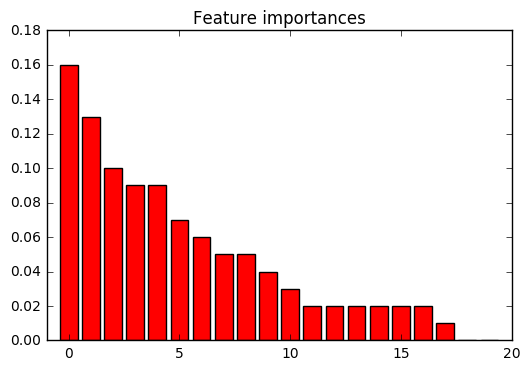

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(adaboost, X, Y)
print scores.mean()                             

adaboost.fit(X_train, Y_train)
importances = adaboost.feature_importances_
std = np.std([tree.feature_importances_ for tree in adaboost.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print str(f+1)+". "+ features_names[indices[f]] + ": "+str(importances[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", align="center")
#plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [14]:
from sklearn import svm
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.5, random_state = True)

clf = svm.SVC(degree=3)
clf.fit(X_train, Y_train)

pred = clf.predict(X_test)
test_time = time() - t0
print("test time:  %0.3fs" % test_time)

score = metrics.accuracy_score(Y_test, pred)
print score



test time:  173.250s
0.867480383609
